# 可積分極限


## 自由粒子極限

kicked rotator

$$
H(q,p,t)  = T(p) + \varepsilon V(q)\sum_{n\in\mathbb{Z}}\delta(t-n) 
$$

を考える．古典の運動方程式は面積保存写像として

$$
p_{n+1} & = p_{n} + \varepsilon V'(q_{n+1}) \\
q_{n+1} & = q_{n} + T'(p_{n+1})
$$

と定義される．$k\to0$において写像は

$$
p_{n+1} & = p_{n} \\
q_{n+1} & = q_{n} + T'(p_{n+1})
$$

は運動量$p$を保存し，古典運動にカオスは出現しない．

## 連続時間極限

写像に新しいパラメーターとして $\tau$を導入する

$$
p_{n+1} & = p_{n} + \varepsilon V'(q_{n})\tau \\
q_{n+1} & = q_{n} + T'(p_{n+1})\tau
$$

$\lim_{\tau\to0} (p_{n+1} - p_{n})/\tau = \frac{dp}{dt}$,$\lim_{\tau\to0} (q_{n+1} - q_{n} )/\tau = \frac{dq}{dt}$
である事を用いれば，
$\tau\to0$の極限で，上の写像はハミルトニアン$H(q,p)=T(q) + kV(q)$の運動方程式

$$
\pdo{p}{q} = -\pdo{H}{p},\qquad
\pdo{q}{t} = \pdo{H}{p}
$$

の面積保存のオイラー差分(刻み幅 $\tau$ に対して1次の陽的差分と陰的差分の組み合わせ)に対応する．
対応する量子写像も同様で

$$
\hat{U} = e^{-\frac{i}{\hbar}T(p)\tau}e^{-\frac{i}{\hbar}\varepsilon V(q)\tau}
$$

で与えられる．
なお，量子写像はハミルトニアン$\hat{H}(q,p) = T(\hat{p}) + V(\hat{q})$の時間発展演算子$\hat{U}=e^{-\frac{i}{\hbar}\hat{H}\tau}$の$\tau$に対する最低次の展開

$$
e^{-\frac{i}{\hbar}\hat{H}\tau} =  e^{-\frac{i}{\hbar}T(\hat{p})\tau}e^{-\frac{i}{\hbar}V(\hat{q})\tau} + O(\tau^2)
$$

となっている．


In [1]:
# ipython notebookを使わない場合は次の命令は無視して下さい
%matplotlib inline

### 例題

$T(p)=\frac{p^2}{2}$, $V(q)=\varepsilon\cos q$ として連続時間極限をSimpleQmap(あまり賢くない方法)で計算する．

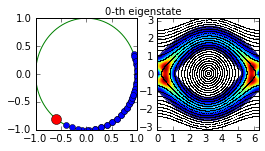

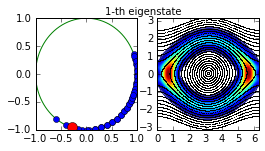

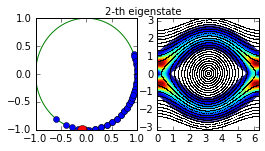

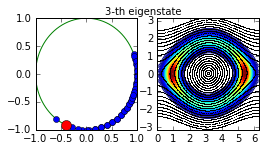

In [2]:
import SimpleQmap as sq
import matplotlib.pyplot as plt
import numpy as np

twopi = 2*np.pi
class ContStd(object):
    def __init__(self, eps, tau):
        self.eps = eps
        self.tau = tau
    def func0(self, x):
        return - self.eps * self.tau * np.sin(x)
    def func1(self,x):
        return self.tau * x
    def ifunc0(self, x):
        return self.eps*self.tau *np.cos(x)
    def ifunc1(self,x):
        return self.tau * x**2/2

def Traj(map,sample=50,tmax=500):
    q = np.array([np.pi]*sample)
    p = np.linspace(-np.pi,np.pi,sample)
    res = [np.array([])]*2
    for i in range(tmax):
        pp = p - map.func0(q)
        qq = q + map.func1(pp)
        p = pp
        q = qq - np.floor(qq/twopi)*twopi
        res[0] = np.append(res[0],q)
        res[1] = np.append(res[1],p)
    return res

eps, tau = 1, 0.05
dim = 50
qr = [0, twopi]
pr = [-np.pi, np.pi]
cmap = ContStd(eps,tau)
traj = Traj(cmap)

domain = [qr,pr]
qmap = sq.Qmap(cmap, dim, domain) # defines the quantum system
evals, evecs = qmap.eigen() # return eigenvalues and list of eigenvector of the system.


for i, evec in enumerate(evecs[::-1]):
    fig,axs = plt.subplots(1,2,figsize=(4,2))

    #evec.savetxt("data.dat",rep="p") # rep = "q", "p" or "hsm"

    theta = np.linspace(-np.pi, np.pi, 100)
    z = np.exp(1.j*theta)
    axs[0].plot(z.real, z.imag,'-g')
    axs[0].plot(evals.real, evals.imag, 'ob')
    axs[0].plot(evals[i].real, evals[i].imag, 'or', markersize=10)

    x,y,z = evec.hsmrep(row=100,col=100)
    axs[1].contour(x,y,z,100)
    axs[1].plot(traj[0],traj[1],',k')

    fig.suptitle("%d-th eigenstate" % i)
    plt.show()
    if i > 2: break
    

## 固有状態の並び替え

### 例1
ユニタリー行列の固有値$u_n = e^{-\frac{i}{\hbar}E_n\tau}$は単位円に乗っているためエルミート行列の様に一意的に(エネルギーの小さい準に)番号付けすることができない．
素朴な方法ではあるが$\tau$が十分小さく上の例のように単位円で擬固有エネルギー$E_n$の順番付け可能な場合，
次の様にして，並べ替える良いであろう．

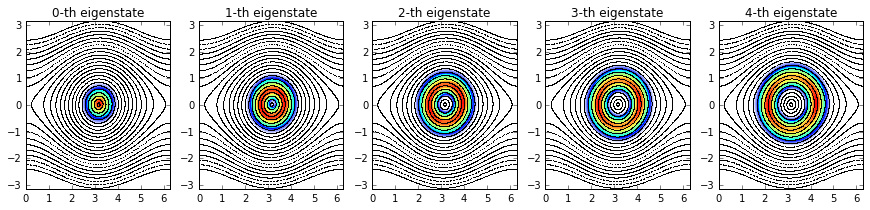

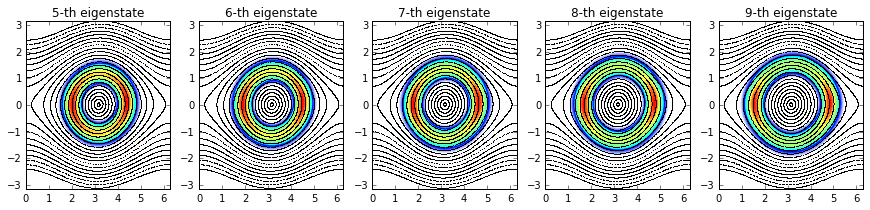

In [3]:
def quasienergy(evals,qmap,tau):
    hbar = qmap.scaleinfo.getPlanck()/twopi
    energy = -hbar*np.log(evals)/(1.j*tau)
    return energy.real

qenergy = quasienergy(evals, qmap,tau)
sort_index = sq.utility.sort_index(qenergy)

figcol= 5
figrow=2

for n, i in enumerate(sort_index):
    if n %figcol == 0:
        fig,axs = plt.subplots(1,figcol,figsize=(figcol*3,3))
    eval = evals[i]
    evec = evecs[i]

    x,y,z = evec.hsmrep(row=50,col=50)
    axs[n%figcol].contourf(x,y,z,100,cmap=sq.utility.hsm_cmap)
    axs[n%figcol].plot(traj[0],traj[1],',k')

    axs[n%figcol].set_title("%d-th eigenstate" % n)
    if n >= figrow*figcol-1:
        break
plt.show()        


### 例2

上記方法は$\tau$(もしくはヒルベルト次元が小さい)小さい場合のみ成功するが，$\tau$が小さくなると計算上精度が悪くなるためあまり賢い方法ではない．
多くの場合ユニタリー行列の固有値を並び替える際には工夫しなければならない．
上記の例で，固有状態の番号付けは$(q,p)=(\pi,0)$を中心として徐々に広がっていく番号付けが自然である．
故に波動関数の$q$ -方向の分散
$$
\int dp \psi^\ast_n(q)(q-\pi)^2\psi_n(q)
$$
の値を小さい順に並べ替えれば実現できそうである．

但しこの方法ではseparatrixより外側では機能せず，またseparix内部であっても上手く機能するか確認する必要が有る．

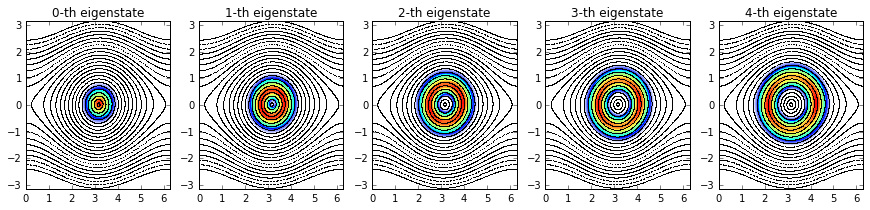

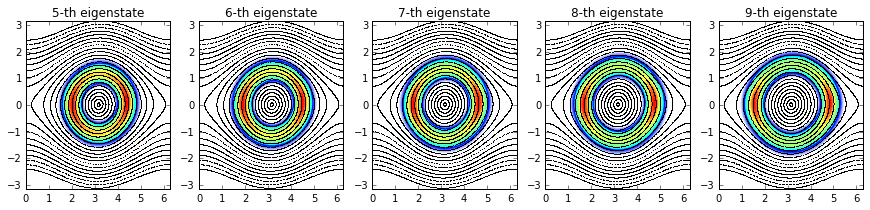

In [4]:
def variance(evecs):
    f = lambda phi,x: np.sum(np.conj(phi)*(x-np.pi)**2*phi).real
    var = np.array([ f(evec.qrep().toarray(), evec.x[0]) for evec in evecs] )
    return var

var = variance(evecs)
sort_index = sq.utility.sort_index(var)

figcol= 5
figrow=2
for n, i in enumerate(sort_index):
    if n %figcol == 0:
        fig,axs = plt.subplots(1,figcol,figsize=(figcol*3,3))

    eval = evals[i]
    evec = evecs[i]

    x,y,z = evec.hsmrep(row=50,col=50)
    axs[n%figcol].contourf(x,y,z,100,cmap=sq.utility.hsm_cmap)
    axs[n%figcol].plot(traj[0],traj[1],',k')

    axs[n%figcol].set_title("%d-th eigenstate" % n)
    if n >= figrow*figcol-1:
        break
plt.show()        